<a href="https://colab.research.google.com/github/Avas77/heart-attack-analysis/blob/other-ml-models/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.kaggle.com/code/avasbajracharya/heart-disease-prediction?scriptVersionId=219093295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Required Packages

In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Overview/EDA

In [3]:
print("Shape of the dataset:", data.shape)


print("\nColumn Info:")
print(data.info())


print("\nMissing Values:")
print(data.isnull().sum())


Shape of the dataset: (1025, 14)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope  

In [4]:
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0

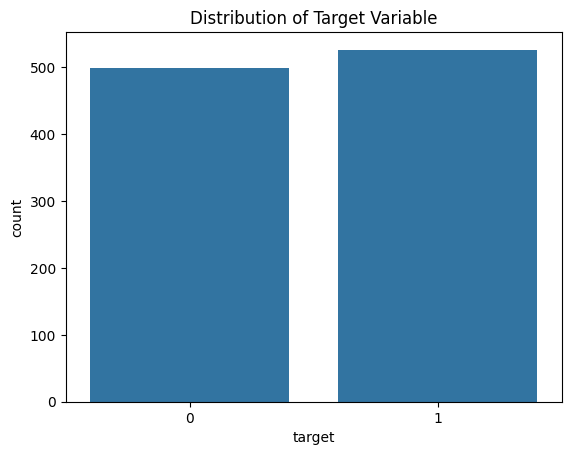

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


#  Correlation Analysis

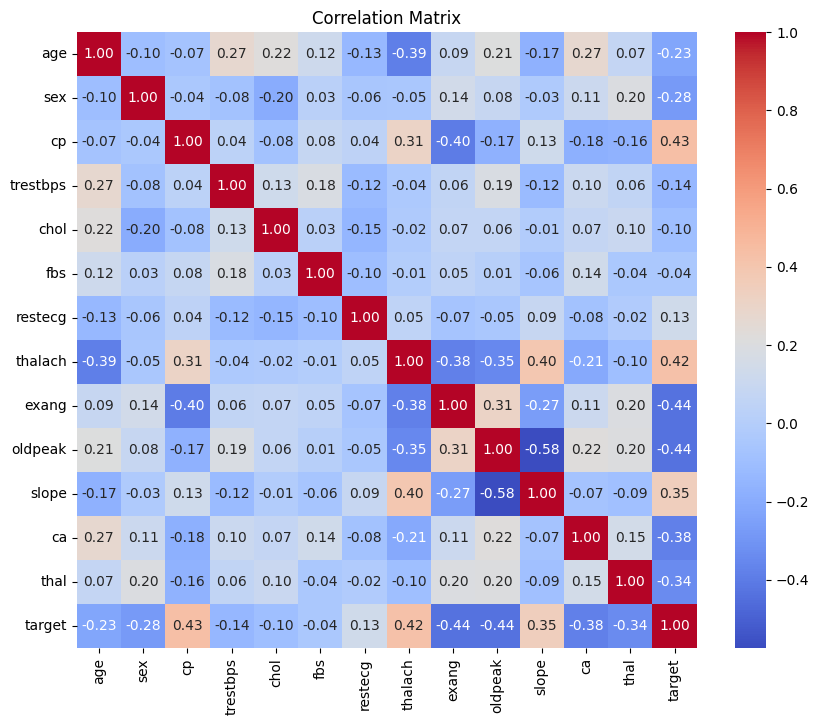

In [6]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Outlier Detection

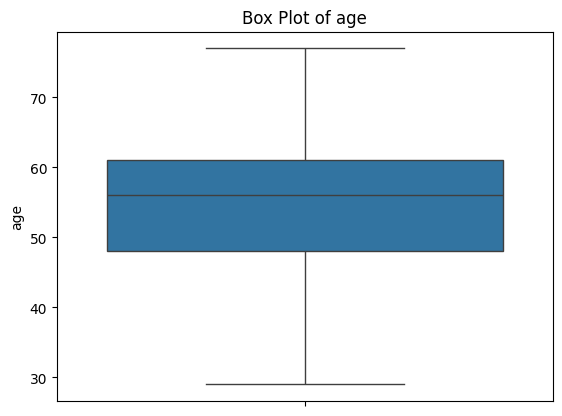

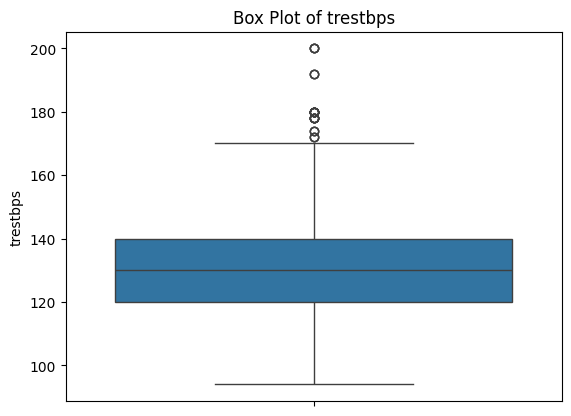

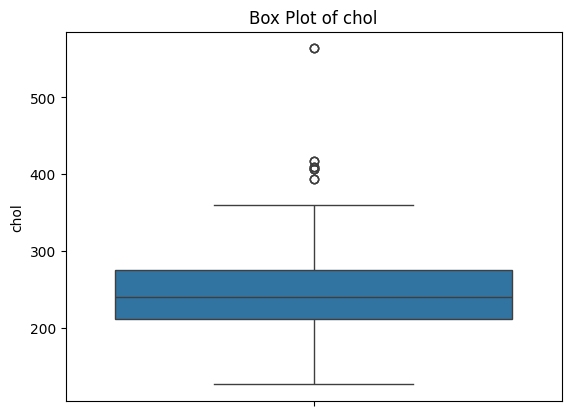

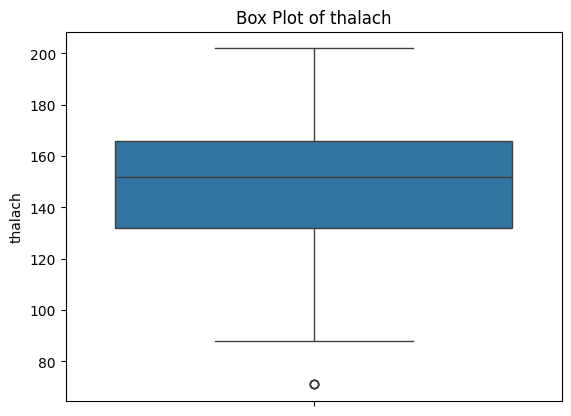

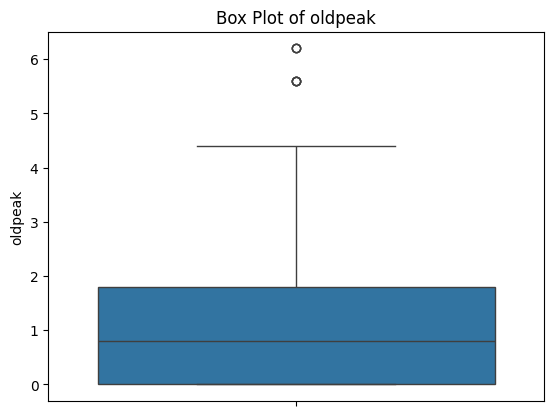

In [7]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in numerical_features:
    sns.boxplot(y=feature, data=data)
    plt.title(f'Box Plot of {feature}')
    plt.show()


# Data Splitting

In [8]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [9]:
# Data Scalling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML models

In [10]:
# Model Training
lr = LogisticRegression()
model = lr.fit(X_train, y_train)


In [11]:
# Model Prediction
lr_predict = lr.predict(X_test)


In [12]:
# Model Evaluation
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [13]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)

rf_predicted = rf.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [14]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predicted = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nb_predicted)
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predicted))

Accuracy of Naive Bayes: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [15]:
# Decisiion Trees
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predicted = dtc.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_predicted)
print("Accuracy of Decision Tree::", dtc_acc_score*100,'\n')
print(classification_report(y_test, dtc_predicted))

Accuracy of Decision Tree:: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



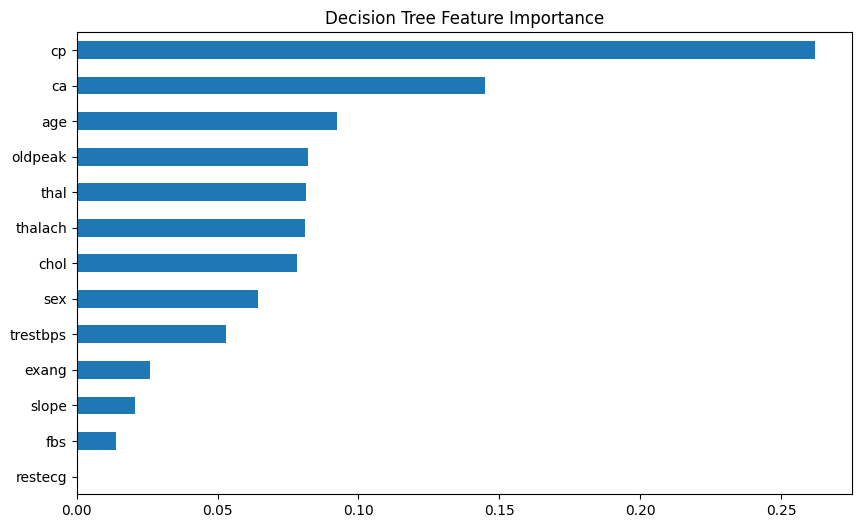

In [16]:
# Features that contributed the most to the decision-making
feature_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Decision Tree Feature Importance")
plt.show()

In [20]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Commpile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7314 - loss: 0.6103 - val_accuracy: 0.7927 - val_loss: 0.5514
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8067 - loss: 0.5158 - val_accuracy: 0.7805 - val_loss: 0.4717
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7973 - loss: 0.4503 - val_accuracy: 0.7805 - val_loss: 0.4210
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8220 - loss: 0.3764 - val_accuracy: 0.7988 - val_loss: 0.3945
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8070 - loss: 0.3657 - val_accuracy: 0.8293 - val_loss: 0.3700
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8723 - loss: 0.3158 - val_accuracy: 0.8415 - val_loss: 0.3621
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8582 - loss: 0.3158 - val_accuracy: 0.8415 - val_loss: 0.3519
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8697 - loss: 0.2778 - val_accuracy: 0.8415 - val_lo

In [23]:
#evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.99


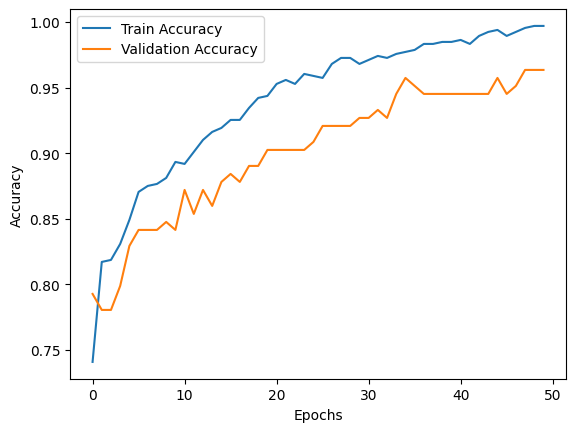

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        98
           1       1.00      0.98      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## **Bar Chart Plot**

In [26]:
model_results = {
     "Logistic Regression": 0.96,
    "Random Forest": 0.93,
    "Neural Network": 0.99,
    "Naive Bayes": 0.85,
    "Decision Tree": 1,
}

<ipython-input-27-94c5552b5206>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


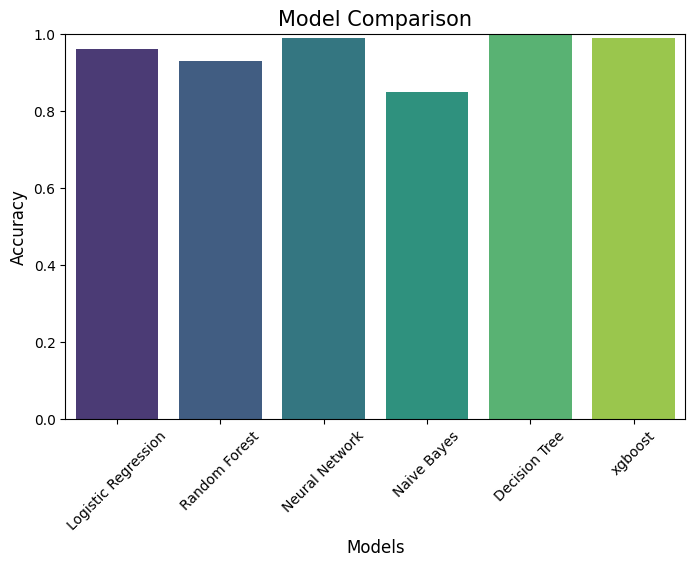

In [27]:
results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
# Plot with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison', fontsize=15)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()